In [73]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = '../1. Data/'
WASTE_PATH = DATA_PATH+'waste.csv'

In [99]:
df = pd.read_csv('../1. Data/waste.csv', delimiter=';', decimal='.')
df['date'] = pd.to_datetime(df['date'])  # convert date column to datetime format

In [100]:
df

,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste
0,411.0,Extra toppings,Prepared-Edible Exc.,Barcelona,B,Article,automatic,2022-08-13 21:00:00,13.906042
1,332.0,Meat,Prepared-Edible Exc.,Barcelona,B,Ingredient,automatic,2022-12-10 20:00:00,11.592153
2,874.0,"Potato, Grains & Pasta",Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-06-03 21:00:00,26.351053
3,508.0,Sandwich,Prepared-Edible Exc.,Madrid,B,Article,manual_1,2021-07-02 21:00:00,23.008216
4,345.0,Fruit & Vegetables,Prepared-Expired,Barcelona,B,Ingredient,automatic,2021-10-21 11:00:00,18.286006
...,...,...,...,...,...,...,...,...,...
53329,67.0,"Sauces, Jams & Condiments",Prepared-Edible Exc.,Barcelona,B,Ingredient,manual_1,2021-08-21 20:00:00,31.691923
53330,604.0,Meat,Inventory Spoilage,Madrid,C,Article,manual_1,2022-08-12 15:00:00,12.820998
53331,179.0,Snacks,Prepared-Edible Exc.,Madrid,A,Ingredient,manual_1,2021-11-14 22:00:00,21.526217
53332,45.0,"Sauces, Jams & Condiments",Prepared-Edible Exc.,Madrid,A,Ingredient,manual_1,2022-03-03 22:00:00,10.216555


In [9]:
df.describe()

,item,waste
count,53334.000000,53334.000000
mean,519.890951,23.224077
std,324.852274,15.996438
min,0.000000,2.092367
25%,258.000000,12.820998
50%,498.000000,19.413342
75%,804.000000,29.383295
max,1159.000000,223.616587


In [88]:
# show timespan of data
df['date'].min(), df['date'].max()

('2021-02-02 08', '2022-12-31 18')

## By item analysis

This first analysis will be focused on extracting insights related to the different items of the dataset.  

In [13]:
# unique elements of item column 
len(df['item'].unique())

845

<AxesSubplot:title={'center':'10 most frequent items'}, ylabel='item'>

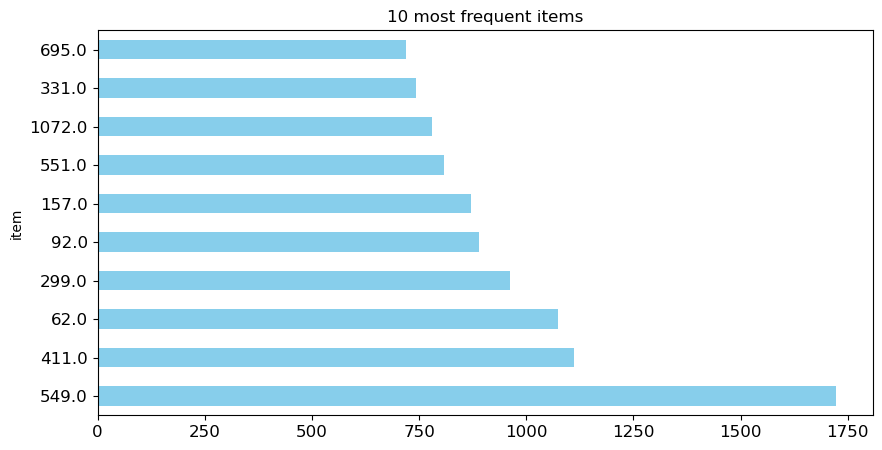

In [35]:
# horizontal bar plot with 10 most frequent items 
df['item'].value_counts().head(10).plot(kind='barh',
                                        title = '10 most frequent items',
                                        figsize=(10,5),
                                        color='skyblue',
                                        fontsize=12,
                                        xlabel='item')

<AxesSubplot:title={'center':'10 most wastefull items'}, ylabel='item'>

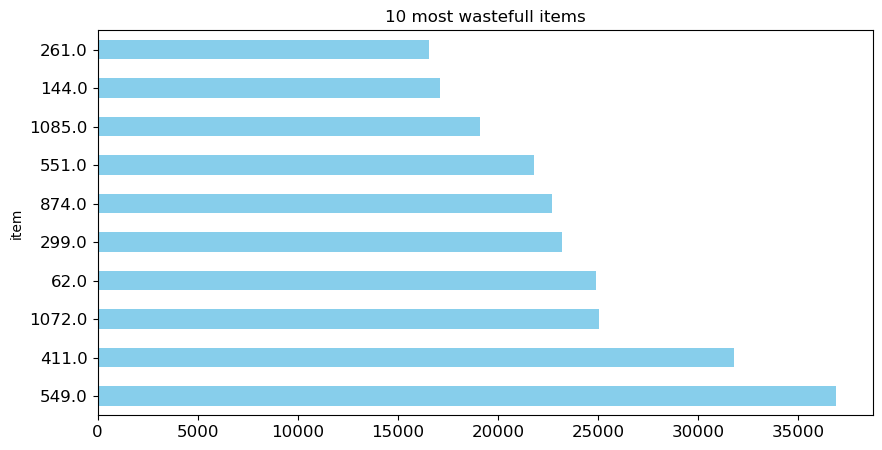

In [34]:
# print total waste per item
df.groupby('item')['waste'].sum().sort_values(ascending=False).head(10).plot(kind='barh',
                                                                            title = '10 most wastefull items',
                                                                            figsize=(10,5),
                                                                            color='skyblue',
                                                                            fontsize=12,
                                                                            xlabel='item')


<AxesSubplot:title={'center':'10 least frequent items'}, ylabel='item'>

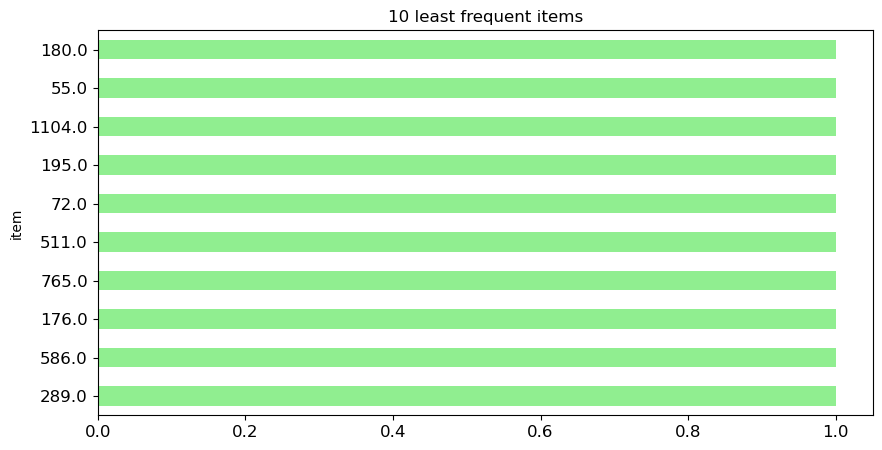

In [38]:
df['item'].value_counts().tail(10).plot(kind='barh',
                                        title = '10 least frequent items',
                                        figsize=(10,5),
                                        color='lightgreen',
                                        fontsize=12,
                                        xlabel='item')

<AxesSubplot:title={'center':'10 least wastefull items'}, ylabel='item'>

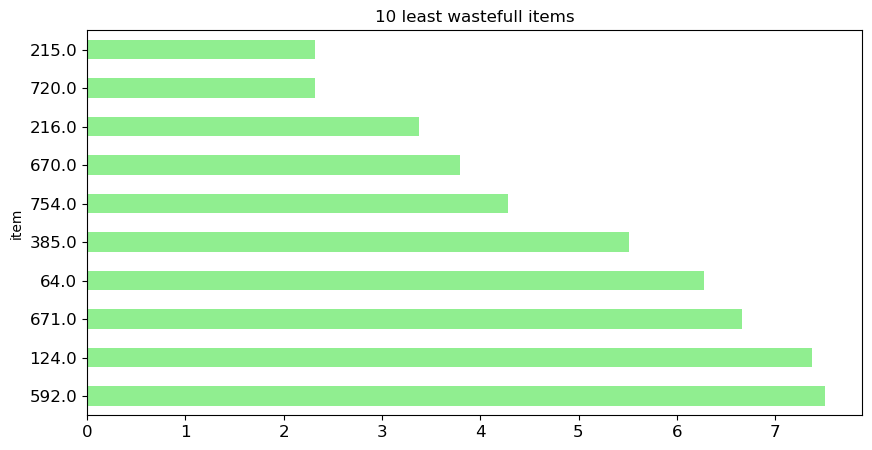

In [40]:
df.groupby('item')['waste'].sum().sort_values(ascending=False).tail(10).plot(kind='barh',
                                                                            title = '10 least wastefull items',
                                                                            figsize=(10,5),
                                                                            color='lightgreen',
                                                                            fontsize=12,
                                                                            xlabel='item')

#### 10 more wastefull items category and article type

In [86]:
# create a dataframe with one sample of each one of the  10 most wastefull items
df_waste = pd.DataFrame()
for item in df.groupby('item')['waste'].sum().sort_values(ascending=False).head(10).index:
    df_waste = df_waste.append(df[df['item']==item].sample(1))

# keep only the columns food_category, article_or_ingredient
df_waste = df_waste[['item','food_category', 'article_or_ingredient']]
df_waste

/var/folders/_z/8tjgjv9d62qfwnfqwr1z6yl00000gq/T/ipykernel_97291/874465328.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_waste = df_waste.append(df[df['item']==item].sample(1))
/var/folders/_z/8tjgjv9d62qfwnfqwr1z6yl00000gq/T/ipykernel_97291/874465328.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_waste = df_waste.append(df[df['item']==item].sample(1))
/var/folders/_z/8tjgjv9d62qfwnfqwr1z6yl00000gq/T/ipykernel_97291/874465328.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_waste = df_waste.append(df[df['item']==item].sample(1))
/var/folders/_z/8tjgjv9d62qfwnfqwr1z6yl00000gq/T/ipykernel_97291/874465328.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

,item,food_category,article_or_ingredient
18549,549.0,Breakfast,Article
31006,411.0,Snacks,Article
30251,1072.0,Desserts & Pastries,Article
16234,62.0,Bread,Ingredient
45682,299.0,Bread,Ingredient
52307,874.0,"Potato, Grains & Pasta",Ingredient
40868,551.0,Desserts & Pastries,Article
15842,1085.0,Snacks,Article
5639,144.0,Meat,Ingredient
14148,261.0,Vegetarian,Ingredient


## Time series of more wastefull items 

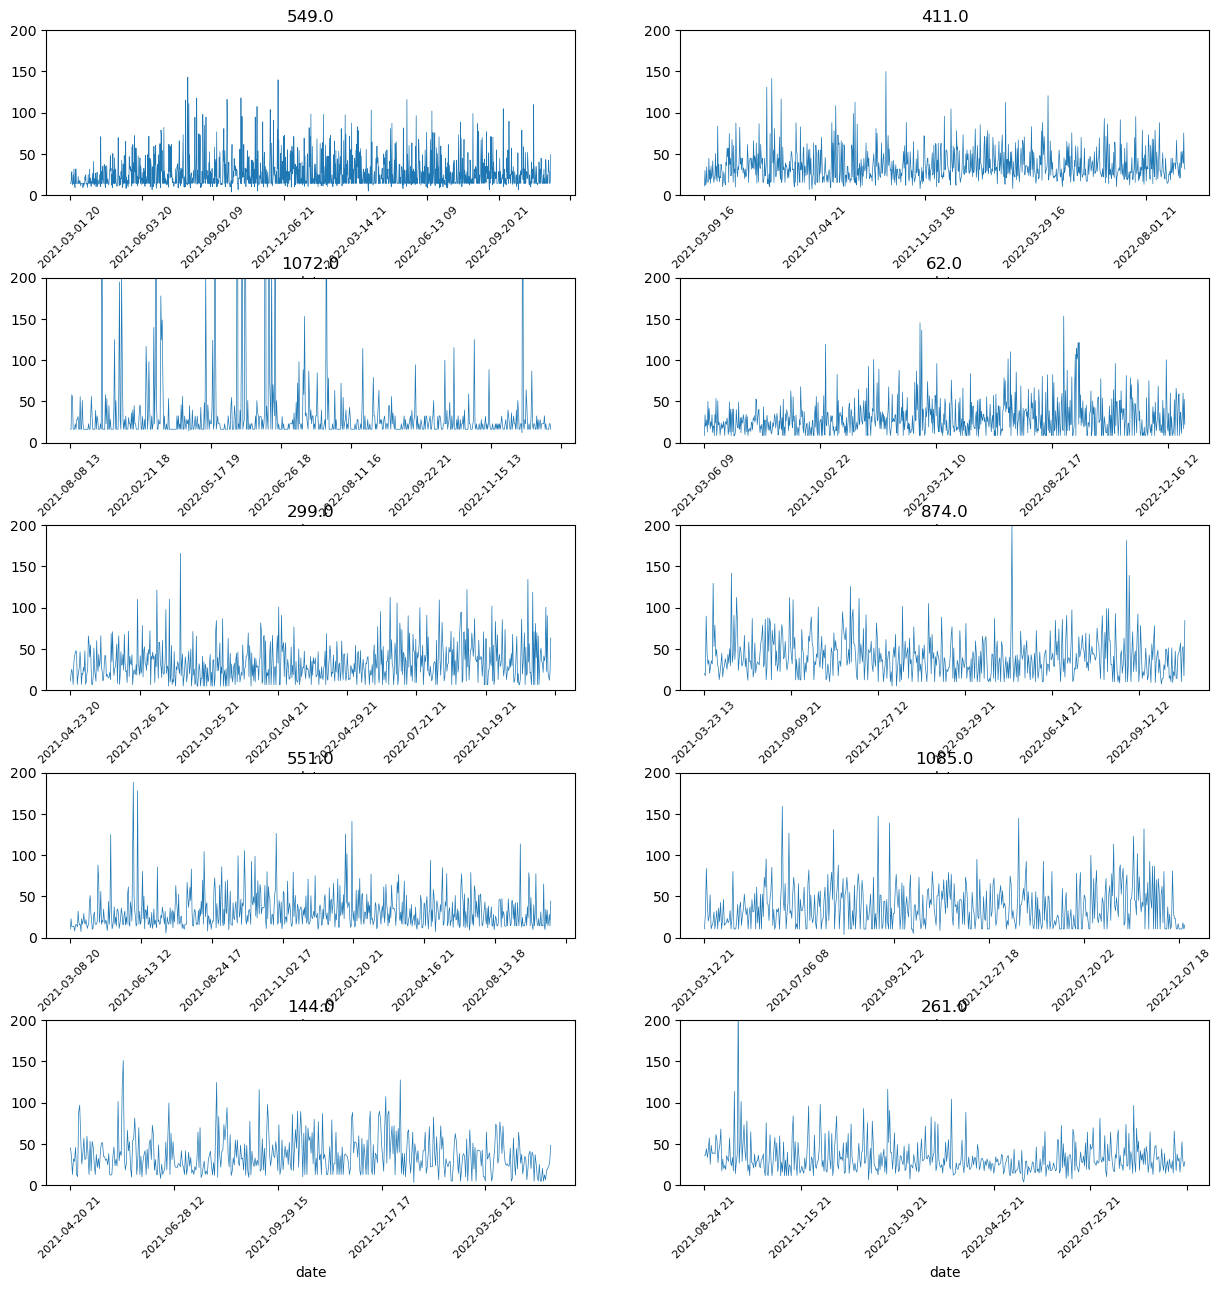

In [89]:
# subplots of 10 more wastefull items time series

#list of 10 more wastefull items
wastefull_items = df.groupby('item')['waste'].sum().sort_values(ascending=False).head(10).index

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

for i,item in enumerate(wastefull_items):
    plt.subplot(5,2,i+1)
    df[df['item']==item].groupby('date')['waste'].sum().plot(title=item, kind='line', linewidth=0.5)
    plt.xticks(rotation=45, fontsize=8)
    plt.ylim(0,200)

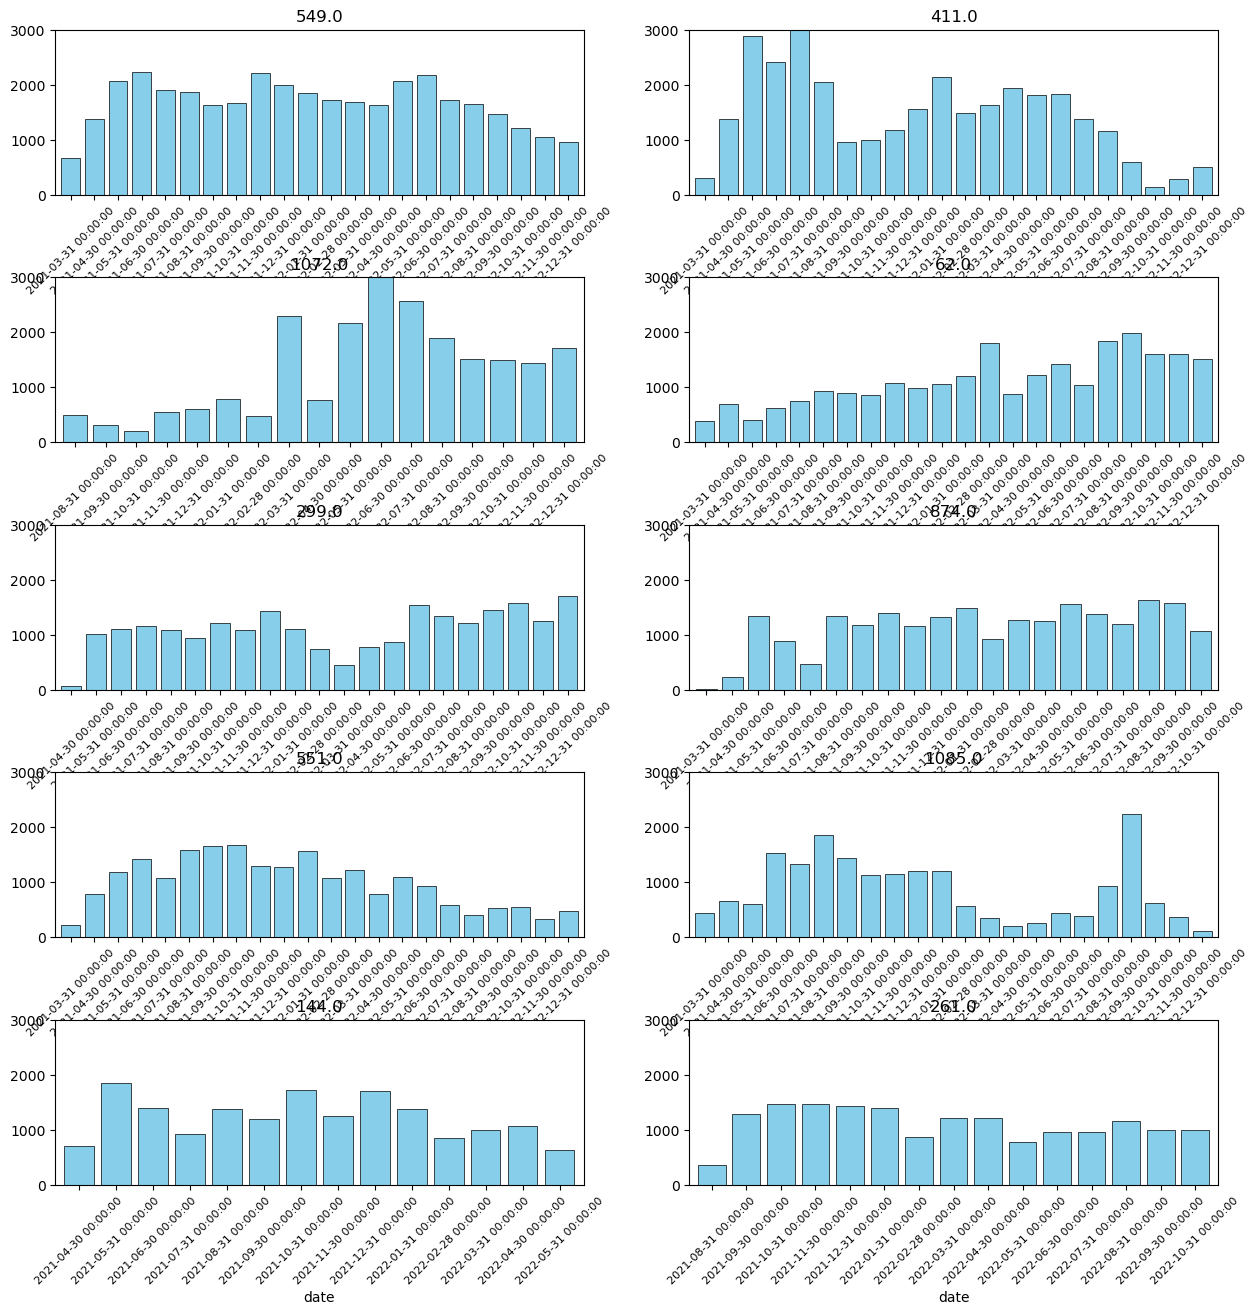

In [98]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

for i, item in enumerate(wastefull_items):
    plt.subplot(5, 2, i+1)
    df[df['item'] == item].groupby(pd.Grouper(key='date', freq='M'))['waste'].sum().plot(
        title=item, kind='bar', width=0.8, edgecolor='black', linewidth=0.5, color='skyblue')
    
    plt.xticks(rotation=45, fontsize=8)
    plt.ylim(0, 3000)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(-100.0, 0, '2022-11-07 10'),
  Text(0.0, 0, '2021-08-08 13'),
  Text(100.0, 0, '2022-02-21 18'),
  Text(200.0, 0, '2022-05-17 19'),
  Text(300.0, 0, '2022-06-26 18'),
  Text(400.0, 0, '2022-08-11 16'),
  Text(500.0, 0, '2022-09-22 21'),
  Text(600.0, 0, '2022-11-15 13'),
  Text(700.0, 0, ''),
  Text(800.0, 0, '')])

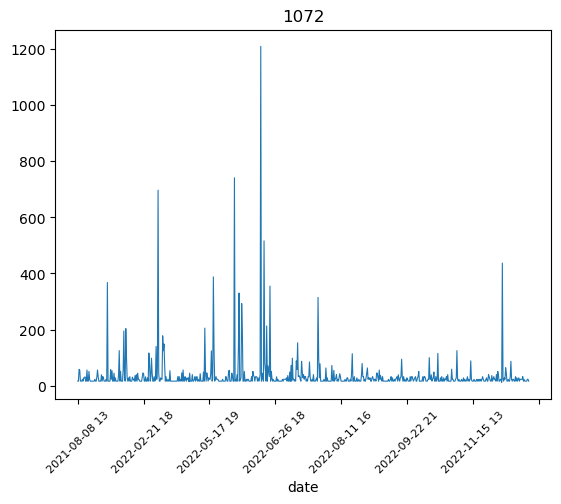

In [72]:
plt.figure()
df[df['item']==1072].groupby('date')['waste'].sum().plot(title=1072, kind='line', linewidth=0.8)
plt.xticks(rotation=45, fontsize=8)
